# Collecting Data 

Please enter your ticker symbol: IBM


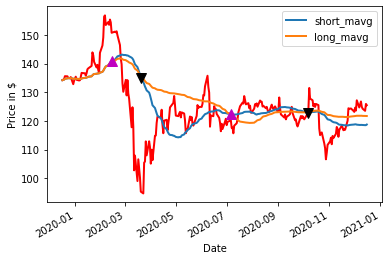

SELL


In [ ]:
# import all necessary libraries
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr


def get_data():
    end = datetime.datetime.today()
    date200 = datetime.timedelta(days=365)
    start200 = end - date200
    start = start200.strftime("%Y-%m-%d")
    ticker = str(input("Please enter your ticker symbol: "))
    ticker_data = pdr.DataReader(ticker, 'yahoo', start, end)
    return ticker_data


def mavg_strategy(data):
    short_window = 40
    long_window = 100
    signals = pd.DataFrame(index=data.index)
    signals['signal'] = 0.0
    # calculate short and long mvag
    signals['short_mavg'] = data['Close'].rolling(window=short_window, min_periods=1, center=False).mean()
    signals['long_mavg'] = data['Close'].rolling(window=long_window, min_periods=1, center=False).mean()
    # Create signals where shortmavg is > longmavg
    signals['signal'][short_window:] = np.where(signals['short_mavg'][short_window:]
                                                > signals['long_mavg'][short_window:], 1.0, 0.0)
    # Generate trading orders
    signals['positions'] = signals['signal'].diff()
    return signals


def plot_ticker(ticker, signals):
    fig = plt.figure()
    # Add a subplot and label for y-axis
    ax1 = fig.add_subplot(111, ylabel='Price in $')
    # Plot the closing price
    ticker['Close'].plot(ax=ax1, color='r', lw=2.)
    # Plot the short and long moving averages
    signals[['short_mavg', 'long_mavg']].plot(ax=ax1, lw=2.)
    # Plot buy signals
    ax1.plot(signals.loc[signals.positions == 1.0].index,
             signals.short_mavg[signals.positions == 1.0],
             '^', markersize=10, color='m')
    # Plot the sell signals
    ax1.plot(signals.loc[signals.positions == -1.0].index,
             signals.short_mavg[signals.positions == -1.0],
             'v', markersize=10, color='k')
    plt.show()


def buy_or_sell():
    data = get_data()
    signals = mavg_strategy(data)
    plot_ticker(data, signals)
    if signals["signal"][-1] == 1.0:
        print("BUY")
    else:
        print("SELL")


buy_or_sell()





# Buy and Sell Desistions

In [ ]:
stocks = ["MSFT", "AAPL", "MMM", "AXP", "AMGN", "BA", "CAT", "CVX", "CSCO", "KO", "GS",
          "HD", "HON", "IBM", "INTC", "JNJ", "JPM", "MCD", "MRK", "NKE", "PG", "CRM",
          "TRV", "UNH", "VZ", "V", "WBA", "WMT", "DIS"]

def get_data(ticker):
    end = datetime.datetime.today()
    date200 = datetime.timedelta(days=100)
    start200 = end - date200
    start = start200.strftime("%Y-%m-%d")
    ticker_data = pdr.DataReader(ticker, 'yahoo', start, end)
    return ticker_data


def buy_or_sell(stock):
    BUY = "BUY"
    SELL = "SELL"
    data = get_data(stock)
    signals = mavg_strategy(data)
    if signals["signal"][-1] == 1.0:
        return BUY
    else:
        return SELL

ratings = []
c


lists = zip(stocks, ratings)
Dictionairy = dict(lists)
print (Dictionairy)


  

{'MSFT': 'BUY', 'AAPL': 'BUY', 'MMM': 'BUY', 'AXP': 'BUY', 'AMGN': 'SELL', 'BA': 'BUY', 'CAT': 'BUY', 'CVX': 'BUY', 'CSCO': 'BUY', 'KO': 'BUY', 'GS': 'BUY', 'HD': 'SELL', 'HON': 'BUY', 'IBM': 'SELL', 'INTC': 'SELL', 'JNJ': 'SELL', 'JPM': 'BUY', 'MCD': 'SELL', 'MRK': 'SELL', 'NKE': 'BUY', 'PG': 'BUY', 'CRM': 'SELL', 'TRV': 'BUY', 'UNH': 'BUY', 'VZ': 'SELL', 'V': 'BUY', 'WBA': 'BUY', 'WMT': 'BUY', 'DIS': 'BUY'}


# Buy and Sell Actions in a Simulated Protfolio 

In [ ]:
data = get_data()
signals = mavg_strategy(data)


#backtester
# Set the initial capital
initial_capital= float(100000.0)

# Create a DataFrame `positions`
positions = pd.DataFrame(index=signals.index).fillna(0.0)

# Buy a 100 shares
positions['stock'] = 100*signals['signal']   
  
# Initialize the portfolio with value owned   
portfolio = positions.multiply(aapl['Adj Close'], axis=0)

# Store the difference in shares owned 
pos_diff = positions.diff()

# Add `holdings` to portfolio
portfolio['holdings'] = (positions.multiply(aapl['Adj Close'], axis=0)).sum(axis=1)

# Add `cash` to portfolio
portfolio['cash'] = base_capital - (pos_diff.multiply(aapl['Adj Close'], axis=0)).sum(axis=1).cumsum()   

# Add `total` to portfolio
portfolio['total'] = portfolio['cash'] + portfolio['holdings']

# Add `returns` to portfolio
portfolio['returns'] = portfolio['total'].pct_change()

Please enter your ticker symbol: AAPL


NameError: ignored

In [ ]:
# new code
# Set base capital
base_capital= float(100000.0)

def transaction(stock):
    if rating == "BUY":
      return print ("Check 1")
    else:
      return print ("Check 2")

transaction(rating)




NameError: ignored

# Plot Current Portfolio 

In [ ]:
def plotprtfolio(portfolio):
    fig = plt.figure()

    ax1 = fig.add_subplot(111, ylabel='Portfolio value in $')

    # Plot the equity curve in dollars
    portfolio['total'].plot(ax=ax1, lw=2.)

    # Plot the "buy" trades against the equity curve
    ax1.plot(portfolio.loc[signals.positions == 1.0].index, 
            portfolio.total[signals.positions == 1.0],
            '^', markersize=10, color='m')

    # Plot the "sell" trades against the equity curve
    ax1.plot(portfolio.loc[signals.positions == -1.0].index, 
            portfolio.total[signals.positions == -1.0],
            'v', markersize=10, color='k')

    # Show the plot
    plt.show()